In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import sqlite3

# Import TMDB Data

In [22]:
tmdb_movies = pd.read_csv('../data/tmdb.movies.csv.gz')
tmdb_movies.rename(columns={'title': 'primary_title'}, inplace=True)
tmdb_movies.drop(columns=['genre_ids', 'original_language', 'original_title'], inplace=True)
tmdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     26517 non-null  int64  
 1   id             26517 non-null  int64  
 2   popularity     26517 non-null  float64
 3   release_date   26517 non-null  object 
 4   primary_title  26517 non-null  object 
 5   vote_average   26517 non-null  float64
 6   vote_count     26517 non-null  int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 1.4+ MB


# The Numbers Data

In [23]:
tn_movie_budgets = pd.read_csv('../data/tn.movie_budgets.csv.gz')
tn_movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [24]:
tn_movie_budgets['release_date'] = pd.to_datetime(tn_movie_budgets['release_date'])
tn_movie_budgets['release_month'] = pd.to_datetime(tn_movie_budgets['release_date']).dt.month_name()
tn_movie_budgets['release_year'] = pd.to_datetime(tn_movie_budgets['release_date']).dt.year

tn_movie_budgets['domestic_gross'] = tn_movie_budgets['domestic_gross'].str.replace('$', '')
tn_movie_budgets['domestic_gross'] = tn_movie_budgets['domestic_gross'].str.replace(',', '').astype(int) 

tn_movie_budgets['worldwide_gross'] = tn_movie_budgets['worldwide_gross'].str.replace('$', '')
tn_movie_budgets['worldwide_gross'] = tn_movie_budgets['worldwide_gross'].str.replace(',', '').astype(int)

tn_movie_budgets['production_budget'] = tn_movie_budgets['production_budget'].str.replace('$', '')
tn_movie_budgets['production_budget'] = tn_movie_budgets['production_budget'].str.replace(',', '').astype(int)

tn_movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   int64         
 4   domestic_gross     5782 non-null   int64         
 5   worldwide_gross    5782 non-null   int64         
 6   release_month      5782 non-null   object        
 7   release_year       5782 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(2)
memory usage: 361.5+ KB


In [25]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
tn_movie_budgets['release_month'] = pd.Categorical(tn_movie_budgets['release_month'], categories=months, ordered=True)
tn_movie_budgets['release_month'].value_counts()

December     745
October      573
August       496
September    493
November     486
June         479
March        470
April        454
July         440
May          407
February     392
January      347
Name: release_month, dtype: int64

In [26]:
tn_movie_budgets.rename(columns={'movie': 'primary_title'}, inplace=True)
tn_movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   primary_title      5782 non-null   object        
 3   production_budget  5782 non-null   int64         
 4   domestic_gross     5782 non-null   int64         
 5   worldwide_gross    5782 non-null   int64         
 6   release_month      5782 non-null   category      
 7   release_year       5782 non-null   int64         
dtypes: category(1), datetime64[ns](1), int64(5), object(1)
memory usage: 322.4+ KB


# Removing zeros


In [27]:
tn_movie_budgets_nonzero = tn_movie_budgets[tn_movie_budgets['domestic_gross'] != 0].copy()

In [28]:
tn_movie_budgets_nonzero.describe()

,id,production_budget,domestic_gross,worldwide_gross,release_year
count,5234.000000,5.234000e+03,5.234000e+03,5.234000e+03,5234.000000
mean,50.346580,3.403348e+07,4.625747e+07,1.007615e+08,2003.308942
std,28.848667,4.296048e+07,7.029651e+07,1.811226e+08,12.619158
min,1.000000,1.100000e+03,3.880000e+02,4.010000e+02,1915.000000
25%,25.000000,6.500000e+06,4.289718e+06,8.142571e+06,1999.000000
50%,50.000000,2.000000e+07,2.198422e+07,3.543844e+07,2006.000000
75%,75.000000,4.500000e+07,5.756598e+07,1.093357e+08,2012.000000
max,100.000000,4.250000e+08,9.366622e+08,2.776345e+09,2019.000000


# Removing Budget Outliers

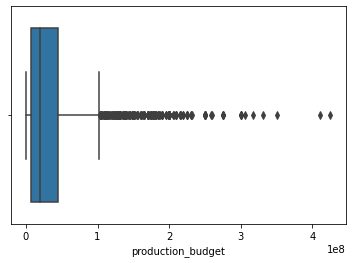

In [29]:
#Boxplot to visualize the outliers
sns.boxplot(x=tn_movie_budgets_nonzero['production_budget'])
plt.show()

In [1]:
# Calculating the first and third quartiles for production budget
Q1 = tn_movie_budgets_nonzero['production_budget'].quantile(0.25)
Q3 = tn_movie_budgets_nonzero['production_budget'].quantile(0.75)

# Calculating the Interquartile Range
IQR = Q3 - Q1

# Getting the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Removing the rows with production budget outliers
tn_movie_budgets_nonzero_no_outliers= tn_movie_budgets_nonzero.loc[(tn_movie_budgets_nonzero['production_budget'] >= lower_bound) & (tn_movie_budgets_nonzero['production_budget'] <= upper_bound)]

tn_movie_budgets_nonzero

NameError: name 'tn_movie_budgets_nonzero' is not defined

# Adding ROI Columns to Movie Budgets table

In [31]:
tn_movie_budgets_nonzero['domestic_ROI'] = ((tn_movie_budgets_nonzero['domestic_gross'] - tn_movie_budgets_nonzero['production_budget']) / tn_movie_budgets_nonzero['production_budget']) * 100

tn_movie_budgets_nonzero['worldwide_ROI'] = ((tn_movie_budgets_nonzero['worldwide_gross'] - tn_movie_budgets_nonzero['production_budget']) / tn_movie_budgets_nonzero['production_budget']) * 100


# SQL DB

In [32]:
conn = sqlite3.connect('../data/im.db')
pd.read_sql('SELECT name AS "Table Names" FROM sqlite_master WHERE type="table"', conn)

,Table Names
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [33]:
# Making the IMDB movie_basics table into a pandas df
imdb_movie_basics = pd.read_sql('SELECT * FROM movie_basics', conn)
imdb_movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [34]:
# Making the IMDB directors table into a pandas df
imdb_directors = pd.read_sql('SELECT * FROM directors', conn)
imdb_directors.value_counts()

movie_id   person_id
tt2249786  nm4630460    52
           nm1667641    52
           nm3952326    52
           nm3911770    52
           nm3863962    52
                        ..
tt3835080  nm0957772     1
tt3835110  nm7064225     1
tt7083156  nm1962933     1
tt3835134  nm7775933     1
tt4105968  nm1297226     1
Length: 163535, dtype: int64

In [35]:
imdb_movie_akas = pd.read_sql('SELECT * FROM movie_akas', conn)
imdb_movie_akas.drop(columns=['is_original_title'], inplace=True)
imdb_movie_akas.head()

,movie_id,ordering,title,region,language,types,attributes
0,tt0369610,10,Джурасик свят,BG,bg,None,None
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None


In [36]:
imdb_writers = pd.read_sql('SELECT * FROM writers', conn)
imdb_writers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255873 entries, 0 to 255872
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   movie_id   255873 non-null  object
 1   person_id  255873 non-null  object
dtypes: object(2)
memory usage: 3.9+ MB


In [111]:
imdb_writers_and_directors2 = pd.read_sql("""
            SELECT * 
            FROM movie_ratings
            INNER JOIN directors
                USING(movie_id)
            INNER JOIN writers
                USING(movie_id)

            
            """, conn)

In [112]:
d_e = pd.read_sql("""
SELECT m.averagerating, person_id, b.primary_title
FROM movie_ratings as m
    JOIN (SELECT DISTINCT movie_id, person_id
FROM directors
GROUP BY person_id
HAVING COUNT() >5) as d_n_e
    ON d_n_e.movie_id = m.movie_id
    JOIN movie_basics AS b
        USING(movie_id)
""", conn)
d_e.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7081 entries, 0 to 7080
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   averagerating  7081 non-null   float64
 1   person_id      7081 non-null   object 
 2   primary_title  7081 non-null   object 
dtypes: float64(1), object(2)
memory usage: 166.1+ KB


In [17]:
# using left join
imdb_writers_and_directors.info()

NameError: name 'imdb_writers_and_directors' is not defined

In [37]:
# using inner join
imdb_writers_and_directors2.info()

NameError: name 'imdb_writers_and_directors2' is not defined

In [38]:
pd.read_sql("""
            SELECT 
            FROM movie_basics AS m
            JOIN directors AS d
                USING(movie_id)
            JOIN writers AS w
                USING(movie_id)

            
            """, conn)

DatabaseError: Execution failed on sql '
            SELECT 
            FROM movie_basics AS m
            JOIN directors AS d
                USING(movie_id)
            JOIN writers AS w
                USING(movie_id)

            
            ': near "FROM": syntax error

In [39]:
#Creating a name for the SQL DB table 'movie_akas'
movie_akas = pd.read_sql("""

SELECT *
       
FROM movie_akas





""", conn)

In [50]:
movie_akas

,movie_id,ordering,title,region,language,types,attributes,is_original_title
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
12,tt0369610,21,Jurassic World 3D,US,None,None,3-D version,0.0
13,tt0369610,22,Jurassic World 3D,DE,None,None,3-D version,0.0
14,tt0369610,23,Jurassic World 3D,XWW,None,None,3-D version,0.0
21,tt0369610,2,Ebb Tide,US,None,None,fake working title,0.0
...,...,...,...,...,...,...,...,...
331578,tt8899108,2,Volviendo a casa,UY,None,None,original subtitled version,0.0
331590,tt8997034,1,Little Germanics,XWW,en,None,informal literal English title,0.0
331633,tt9190740,1,Car Ribna Wali,IN,ur,None,alternative transliteration,0.0
331660,tt9447768,1,The Town School,LK,None,None,alternative transliteration,0.0


In [51]:
#Renaming 'movie' column to 'primary_title' so I can join table with 'tn_movie_budgets' table
movie_akas = movie_akas.rename(columns={"title": "primary_title"})

In [52]:
movie_akas = movie_akas.dropna(subset=['attributes'])


# Combining Dataframes


In [53]:
# Combing the IMDB 'movie_basics' table with the TMDB 'tmdb_movies' table

merged_movie_basics = pd.merge(imdb_movie_basics, tmdb_movies, on='primary_title')
merged_movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23612 entries, 0 to 23611
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         23612 non-null  object 
 1   primary_title    23612 non-null  object 
 2   original_title   23607 non-null  object 
 3   start_year       23612 non-null  int64  
 4   runtime_minutes  21750 non-null  float64
 5   genres           23263 non-null  object 
 6   Unnamed: 0       23612 non-null  int64  
 7   id               23612 non-null  int64  
 8   popularity       23612 non-null  float64
 9   release_date     23612 non-null  object 
 10  vote_average     23612 non-null  float64
 11  vote_count       23612 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 2.3+ MB


In [54]:
merged_exp_directors = pd.merge(d_e, tmdb_movies, on='primary_title')
merged_exp_directors = pd.merge(merged_exp_directors, tn_movie_budgets, on='primary_title')
merged_exp_directors.info()

NameError: name 'd_e' is not defined

In [55]:
#Combining SQL table 'movie_akas' with 'tn_movie_budgets'
movie_akas_budgets = pd.merge(movie_akas, tn_movie_budgets_nonzero, on = 'primary_title')
#Combining the combined dataframe 'movie_akas_budgets' with 'tmbd_movies' to get the popualarity and vote ratings
movieakas_budgets_popularity = pd.merge(movie_akas_budgets, tmdb_movies, on = 'primary_title')

In [56]:
movieakas_budgets_popularity.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 254 entries, 0 to 253
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   movie_id           254 non-null    object        
 1   ordering           254 non-null    int64         
 2   primary_title      254 non-null    object        
 3   region             253 non-null    object        
 4   language           80 non-null     object        
 5   types              0 non-null      object        
 6   attributes         254 non-null    object        
 7   is_original_title  254 non-null    float64       
 8   id_x               254 non-null    int64         
 9   release_date_x     254 non-null    datetime64[ns]
 10  production_budget  254 non-null    int64         
 11  domestic_gross     254 non-null    int64         
 12  worldwide_gross    254 non-null    int64         
 13  release_month      254 non-null    category      
 14  release_ye

In [57]:
#Dropping columns from the merged "movie_akas_budgets" data frame that we will not need.
movieakas_budgets_popularity.drop(columns=['movie_id', 'ordering', 'region', 'language', 'types', 'Unnamed: 0', 'is_original_title', 'id_x', 'release_month', 'release_year', 'id_y', 'release_date_y'], inplace=True)

# Creating Tables With and Without 3-D Movies

In [58]:
threed_budgets_df= movieakas_budgets_popularity[movieakas_budgets_popularity['attributes'].str.contains('3-D')]
no_threed_budgets_df= movieakas_budgets_popularity[movieakas_budgets_popularity['attributes'].str.contains('3-D')==False]

In [59]:
#Dropping duplicate rows if release date and title match. Also including worldwide_gross as a criteria to make sure we are not deleting different releases
threed_budgets_df = threed_budgets_df.drop_duplicates(subset=['release_date_x', 'primary_title', 'worldwide_gross'])

no_threed_budgets_df = no_threed_budgets_df.drop_duplicates(subset=['release_date_x', 'primary_title', 'worldwide_gross'])

In [93]:
threed_budgets_df.describe()

,production_budget,domestic_gross,worldwide_gross,domestic_ROI,worldwide_ROI,popularity,vote_average,vote_count
count,1.100000e+01,1.100000e+01,1.100000e+01,11.000000,11.000000,11.000000,11.000000,11.000000
mean,5.545455e+07,8.566163e+07,2.543469e+08,92.243408,327.846311,12.573091,6.036364,2377.818182
std,3.362548e+07,9.987474e+07,3.385880e+08,209.600823,450.663420,6.127976,0.857056,2388.363030
min,8.000000e+06,8.817450e+05,8.817450e+05,-96.473020,-96.473020,2.758000,4.300000,6.000000
25%,2.000000e+07,1.791551e+07,4.870375e+07,-62.604211,-16.089267,9.724000,5.600000,583.500000
50%,6.500000e+07,5.825080e+07,9.903412e+07,-33.104200,240.457017,10.285000,6.300000,1068.000000
75%,8.250000e+07,1.106635e+08,3.259917e+08,233.120521,437.634410,15.935500,6.700000,3747.000000
max,9.500000e+07,3.360458e+08,1.160336e+09,461.645462,1468.021855,24.968000,7.100000,7343.000000


In [94]:
no_threed_budgets_df.describe()

,production_budget,domestic_gross,worldwide_gross,domestic_ROI,worldwide_ROI,popularity,vote_average,vote_count
count,1.530000e+02,1.530000e+02,1.530000e+02,153.000000,153.000000,153.000000,153.000000,153.000000
mean,2.913611e+07,4.374841e+07,9.778035e+07,239.395517,592.673836,10.245928,6.250980,1430.712418
std,2.633286e+07,5.590933e+07,1.366078e+08,1228.120535,2023.608362,6.960551,1.092024,2321.558046
min,5.000000e+04,1.632000e+03,1.632000e+03,-99.883429,-99.883429,0.600000,1.000000,1.000000
25%,8.000000e+06,7.388654e+06,1.849544e+07,-51.111400,10.697386,5.596000,5.800000,61.000000
50%,2.200000e+07,2.519505e+07,5.410422e+07,7.212898,145.898193,10.196000,6.200000,894.000000
75%,5.000000e+07,5.117889e+07,1.120063e+08,180.319958,394.786964,13.493000,7.000000,1907.000000
max,1.000000e+08,3.630707e+08,8.949853e+08,14361.538462,21438.461538,37.197000,9.000000,20175.000000


# Visualizing the Mean Comparisons for 3-D and not 3-D groups

### We can use bar graphs to see how the means compare between the groups for different variables

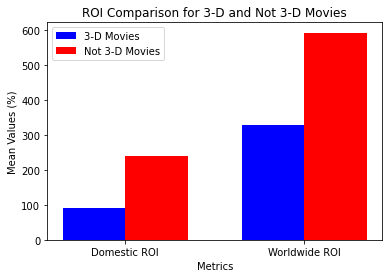

In [124]:
#Creating a Group Bar Chart Comparing the ROIs
categories = ['Domestic ROI', 'Worldwide ROI']
threed_means = [threed_budgets_df['domestic_ROI'].mean(), threed_budgets_df['worldwide_ROI'].mean() ]
no_threed_means = [no_threed_budgets_df['domestic_ROI'].mean(), no_threed_budgets_df['worldwide_ROI'].mean()]


# Set the positions of bars on X-axis
r1 = range(len(categories))
r2 = [x + bar_width for x in r1]

# Create the grouped bar plot
plt.bar(r1, threed_means, color='blue', width=bar_width, label='3-D Movies')
plt.bar(r2, no_threed_means, color='red', width=bar_width, label='Not 3-D Movies')

# Add labels, title, and legend
plt.xlabel('Metrics')
plt.ylabel('Mean Values (%)')
plt.title('ROI Comparison for 3-D and Not 3-D Movies')
plt.xticks([r + bar_width/2 for r in r1], categories)
plt.legend()

# Show the plot
plt.show()

<ipython-input-123-e39f50fb5a9e>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['0', '$50,000,000', '$100,000,000', '$150,000,000', '$200,000,000', '$250,000,000'])


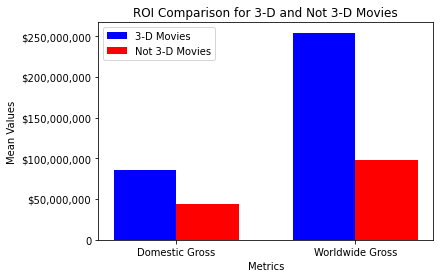

In [123]:
#Creating a Group Bar Chart Comparing the Gross Revenues
categories = ['Domestic Gross', 'Worldwide Gross']
threed_means = [threed_budgets_df['domestic_gross'].mean(), threed_budgets_df['worldwide_gross'].mean() ]
no_threed_means = [no_threed_budgets_df['domestic_gross'].mean(), no_threed_budgets_df['worldwide_gross'].mean()]

# Set the positions of bars on X-axis
r1 = range(len(categories))
r2 = [x + bar_width for x in r1]

# Create the grouped bar plot
plt.bar(r1, threed_means, color='blue', width=bar_width, label='3-D Movies')
plt.bar(r2, no_threed_means, color='red', width=bar_width, label='Not 3-D Movies')

# Add labels, title, and legend
plt.xlabel('Metrics')
plt.ylabel('Mean Values')
plt.title('ROI Comparison for 3-D and Not 3-D Movies')
plt.xticks([r + bar_width/2 for r in r1], categories)
plt.gca().set_yticklabels(['0', '$50,000,000', '$100,000,000', '$150,000,000', '$200,000,000', '$250,000,000'])
plt.legend()

# Show the plot
plt.show()

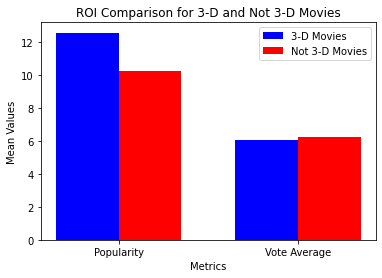

In [126]:
#Creating a Group Bar Chart Comparing the Popularity Metrics
categories = ['Popularity', 'Vote Average']
threed_means = [threed_budgets_df['popularity'].mean(), threed_budgets_df['vote_average'].mean() ]
no_threed_means = [no_threed_budgets_df['popularity'].mean(), no_threed_budgets_df['vote_average'].mean()]


# Set the positions of bars on X-axis
r1 = range(len(categories))
r2 = [x + bar_width for x in r1]

# Create the grouped bar plot
plt.bar(r1, threed_means, color='blue', width=bar_width, label='3-D Movies')
plt.bar(r2, no_threed_means, color='red', width=bar_width, label='Not 3-D Movies')

# Add labels, title, and legend
plt.xlabel('Metrics')
plt.ylabel('Mean Values')
plt.title('ROI Comparison for 3-D and Not 3-D Movies')
plt.xticks([r + bar_width/2 for r in r1], categories)
plt.legend()

# Show the plot
plt.show()

# Two-sample independent t-tests comparing 3-D and not 3-D

###  First we can see whether the variances are equal or not for each variable that we are comparing the two samples on

In [74]:
np.var(threed_budgets_df['worldwide_ROI'])

184634.10729728002

In [75]:
np.var(no_threed_budgets_df['worldwide_ROI'])

4068226.155741158

In [76]:
np.var(threed_budgets_df['domestic_ROI'])

39938.64087428763

In [77]:
np.var(no_threed_budgets_df['domestic_ROI'])

1498422.008081205

In [78]:
np.var(threed_budgets_df['domestic_gross'])

9068149298052860.0

In [79]:
np.var(no_threed_budgets_df['domestic_gross'])

3105423020212696.0

In [80]:
np.var(threed_budgets_df['worldwide_gross'])

1.042198299732245e+17

In [81]:
np.var(no_threed_budgets_df['worldwide_gross'])

1.8539726604664636e+16

In [82]:
np.var(threed_budgets_df['popularity'])

34.13826117355372

In [83]:
np.var(no_threed_budgets_df['popularity'])

48.132604197445424

In [84]:
np.var(threed_budgets_df['vote_average'])

0.6677685950413226

In [85]:
np.var(no_threed_budgets_df['vote_average'])

1.184721261053441

### Now we can run our two-sample independent t-tests

In [86]:
#T test for 'worldwide ROI'
tstat, pvalue = stats.ttest_ind(threed_budgets_df['worldwide_ROI'], no_threed_budgets_df['worldwide_ROI'], equal_var = False)
pvalue

0.21854389214966494

In [87]:
#T test for 'domestic ROI'
tstat, pvalue = stats.ttest_ind(threed_budgets_df['domestic_ROI'], no_threed_budgets_df['domestic_ROI'], equal_var = False)
pvalue

0.21458899635352224

In [88]:
#T test for 'worldwide gross'
tstat, pvalue = stats.ttest_ind(threed_budgets_df['worldwide_gross'], no_threed_budgets_df['worldwide_gross'], equal_var = False)
pvalue

0.15760750482672112

In [89]:
#T test for 'domestic gross'
tstat, pvalue = stats.ttest_ind (threed_budgets_df['domestic_gross'], no_threed_budgets_df['domestic_gross'],equal_var = False)
pvalue

0.19744966787649554

In [90]:
#T test for 'popularity'
tstat, pvalue = stats.ttest_ind (threed_budgets_df['popularity'], no_threed_budgets_df['popularity'],equal_var = False)
pvalue

0.25159870304957543

In [91]:
#T test for 'voting average'
tstat, pvalue = stats.ttest_ind (threed_budgets_df['vote_average'], no_threed_budgets_df['vote_average'],equal_var = False)
pvalue

0.4466038256273329